Import necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('/MACHINE_LEARNING/winequality-white.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


C:\Users\DELL\AppData\Local\Temp\ipykernel_1340\1580698622.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 4))


<Figure size 1000x400 with 0 Axes>

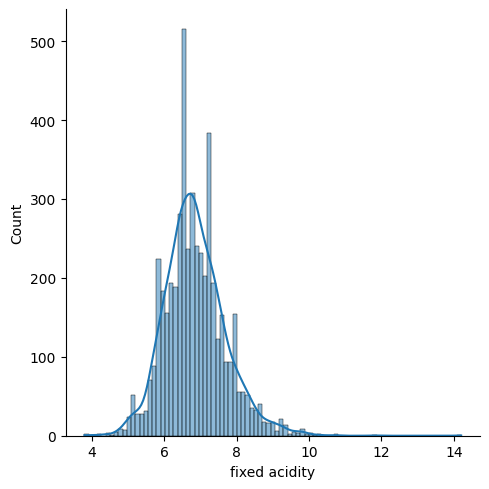

<Figure size 1000x400 with 0 Axes>

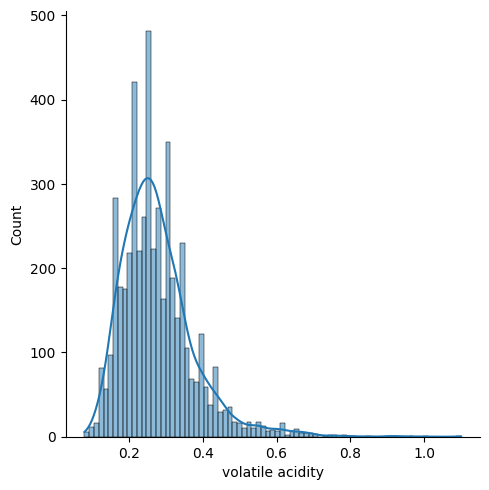

<Figure size 1000x400 with 0 Axes>

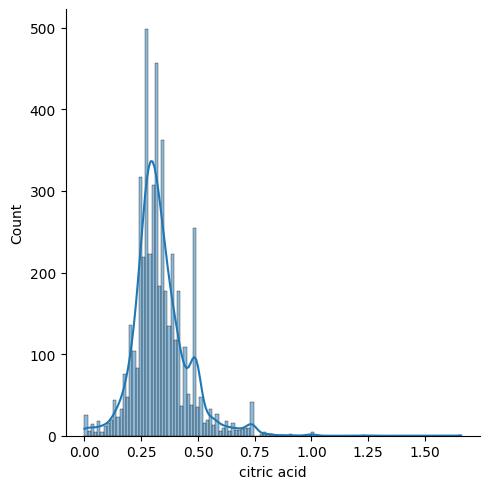

<Figure size 1000x400 with 0 Axes>

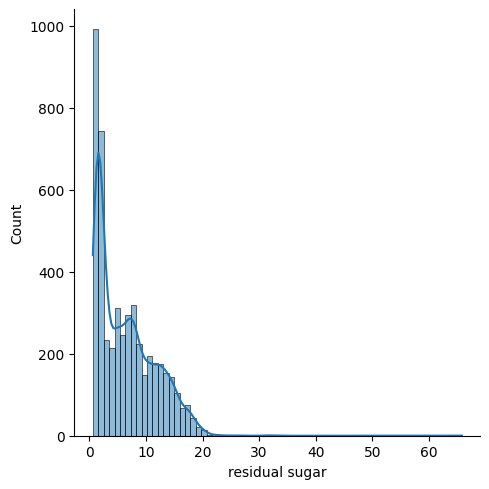

<Figure size 1000x400 with 0 Axes>

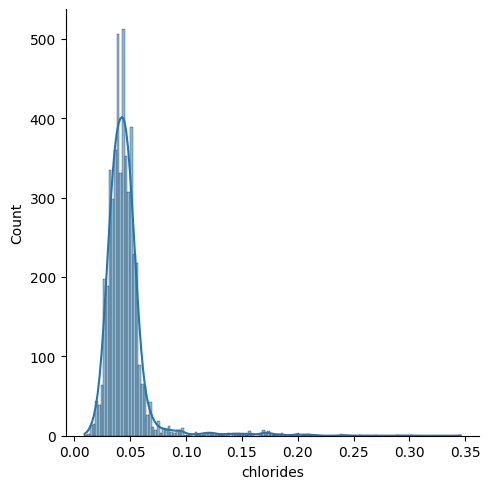

<Figure size 1000x400 with 0 Axes>

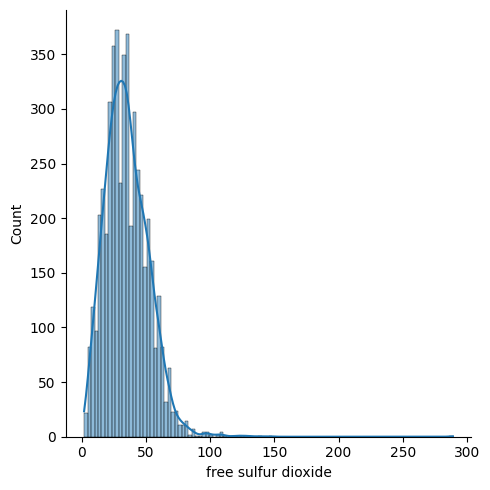

<Figure size 1000x400 with 0 Axes>

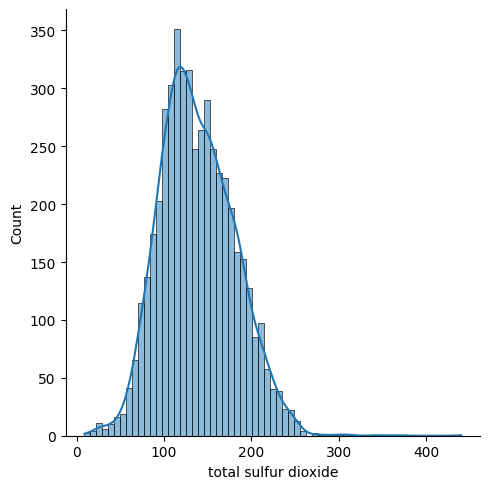

<Figure size 1000x400 with 0 Axes>

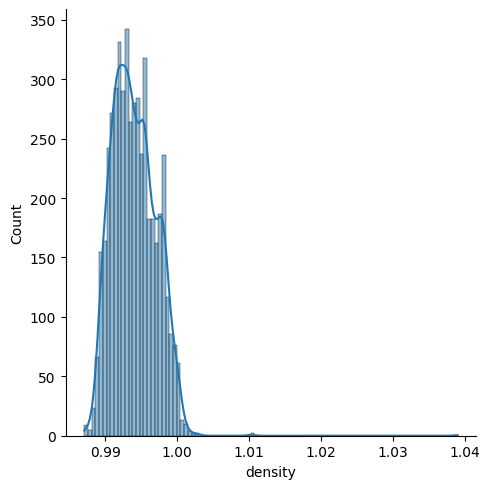

<Figure size 1000x400 with 0 Axes>

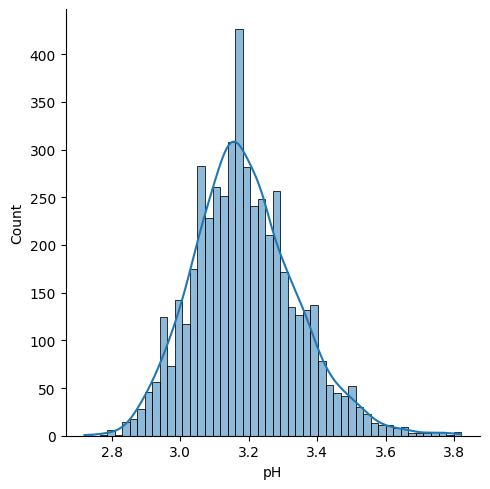

<Figure size 1000x400 with 0 Axes>

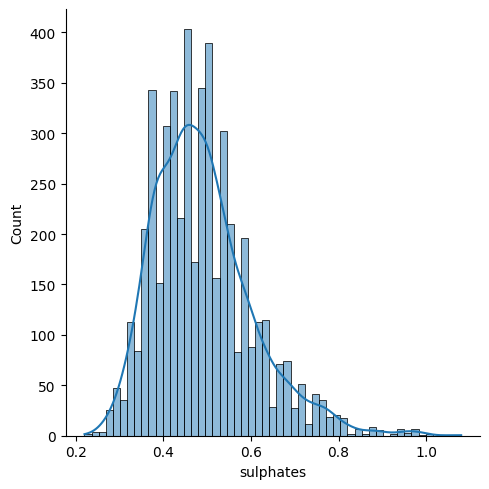

<Figure size 1000x400 with 0 Axes>

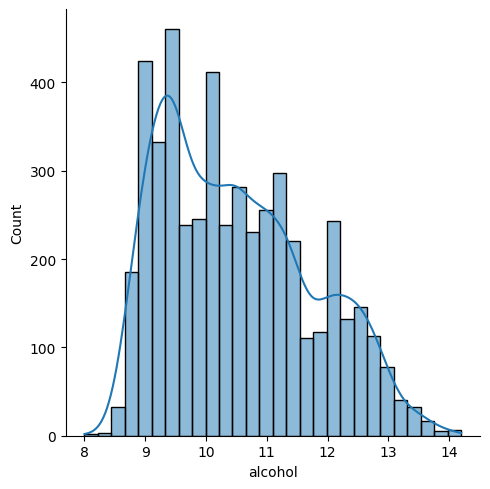

In [3]:
X=data.drop('quality',axis=1)
Y=data['quality']
cols=X.columns
for col in cols:
    fig = plt.figure(figsize=(10, 4))
    sns.displot(data[col], kde=True)

<Axes: >

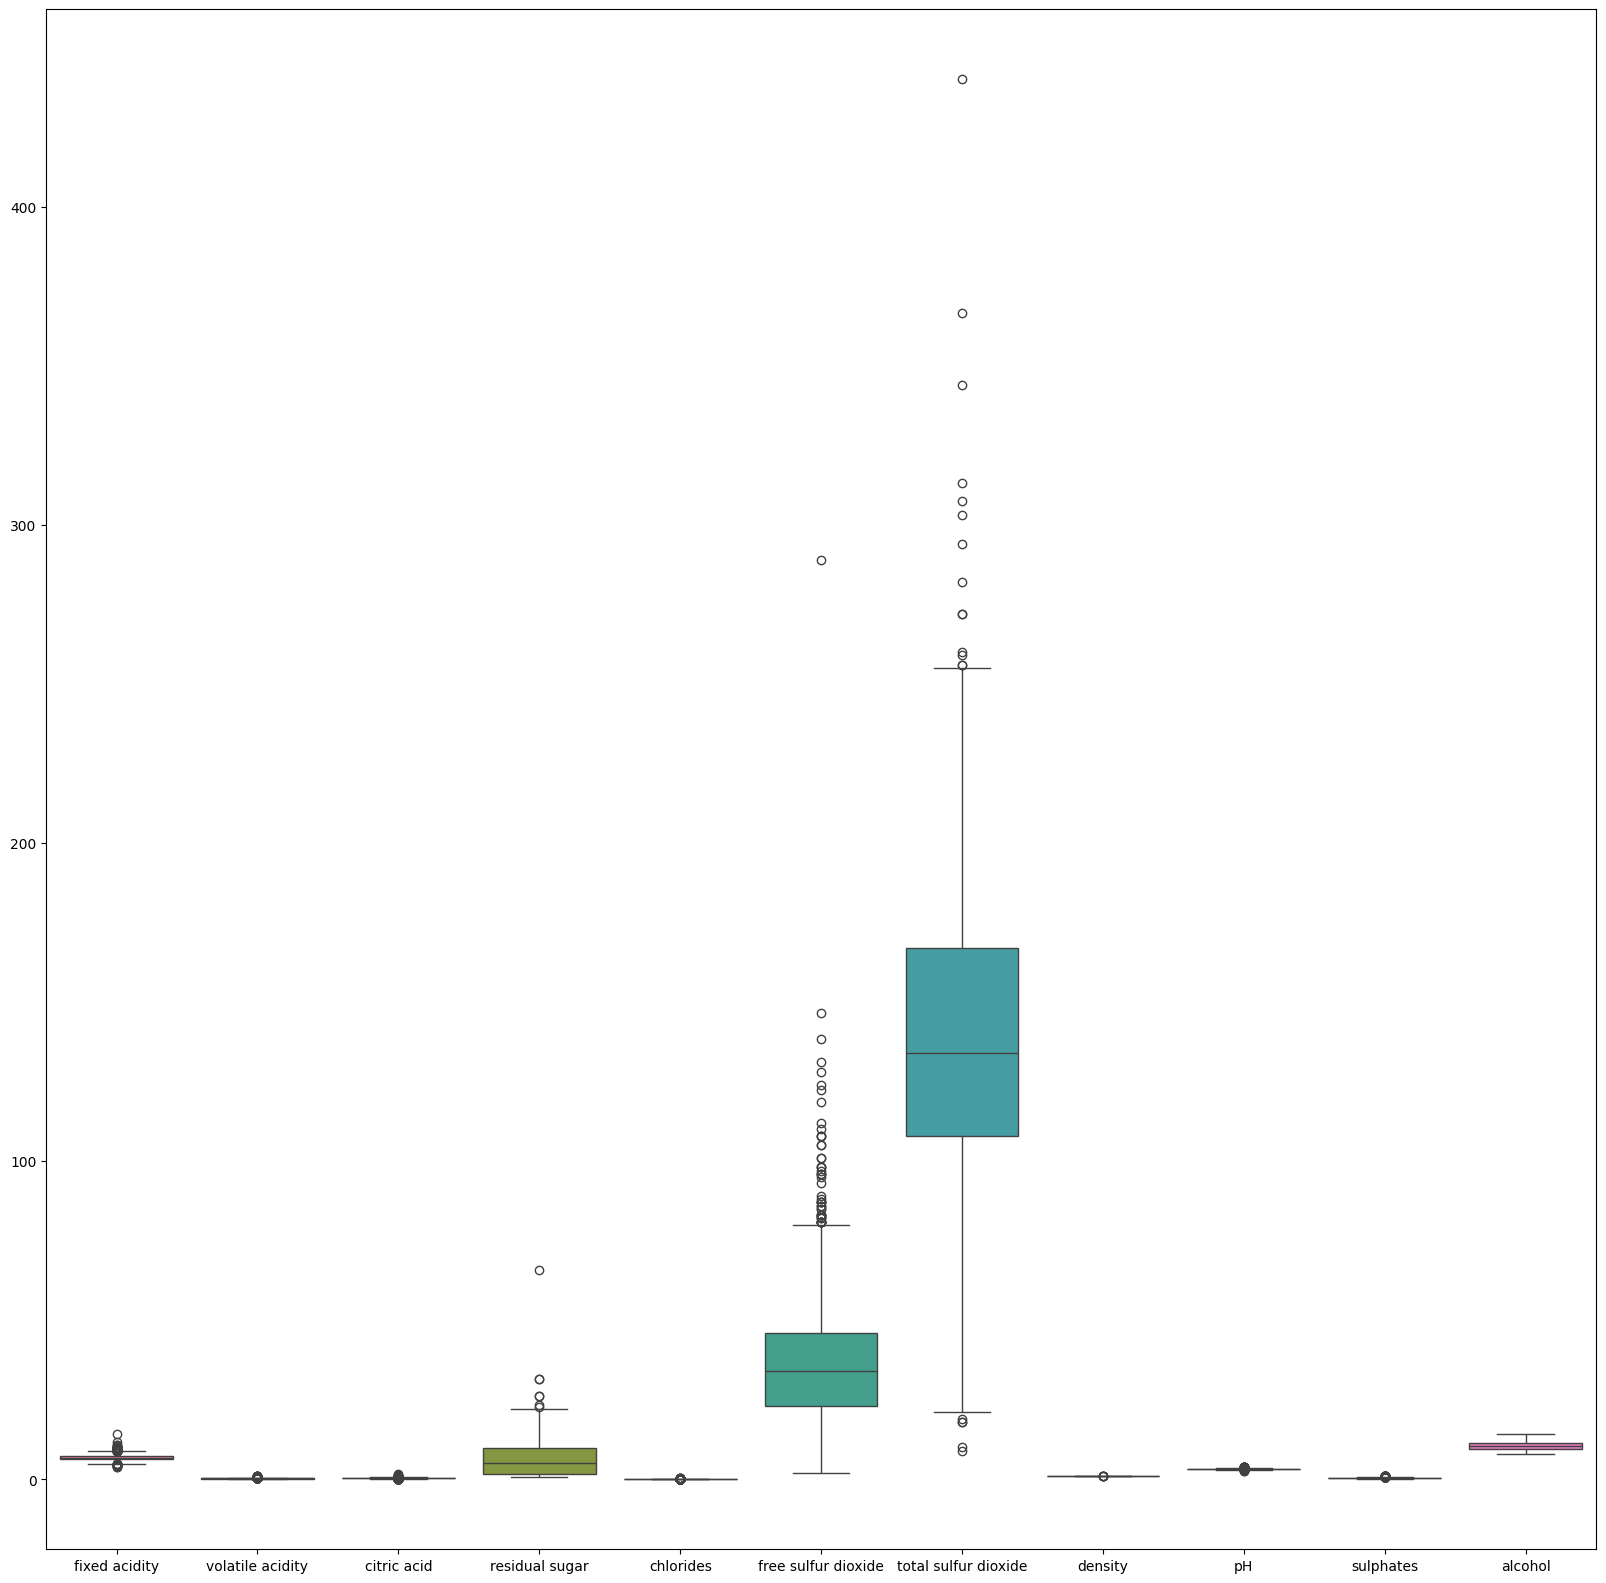

In [4]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data=X, ax=ax)

Standardization

<Axes: >

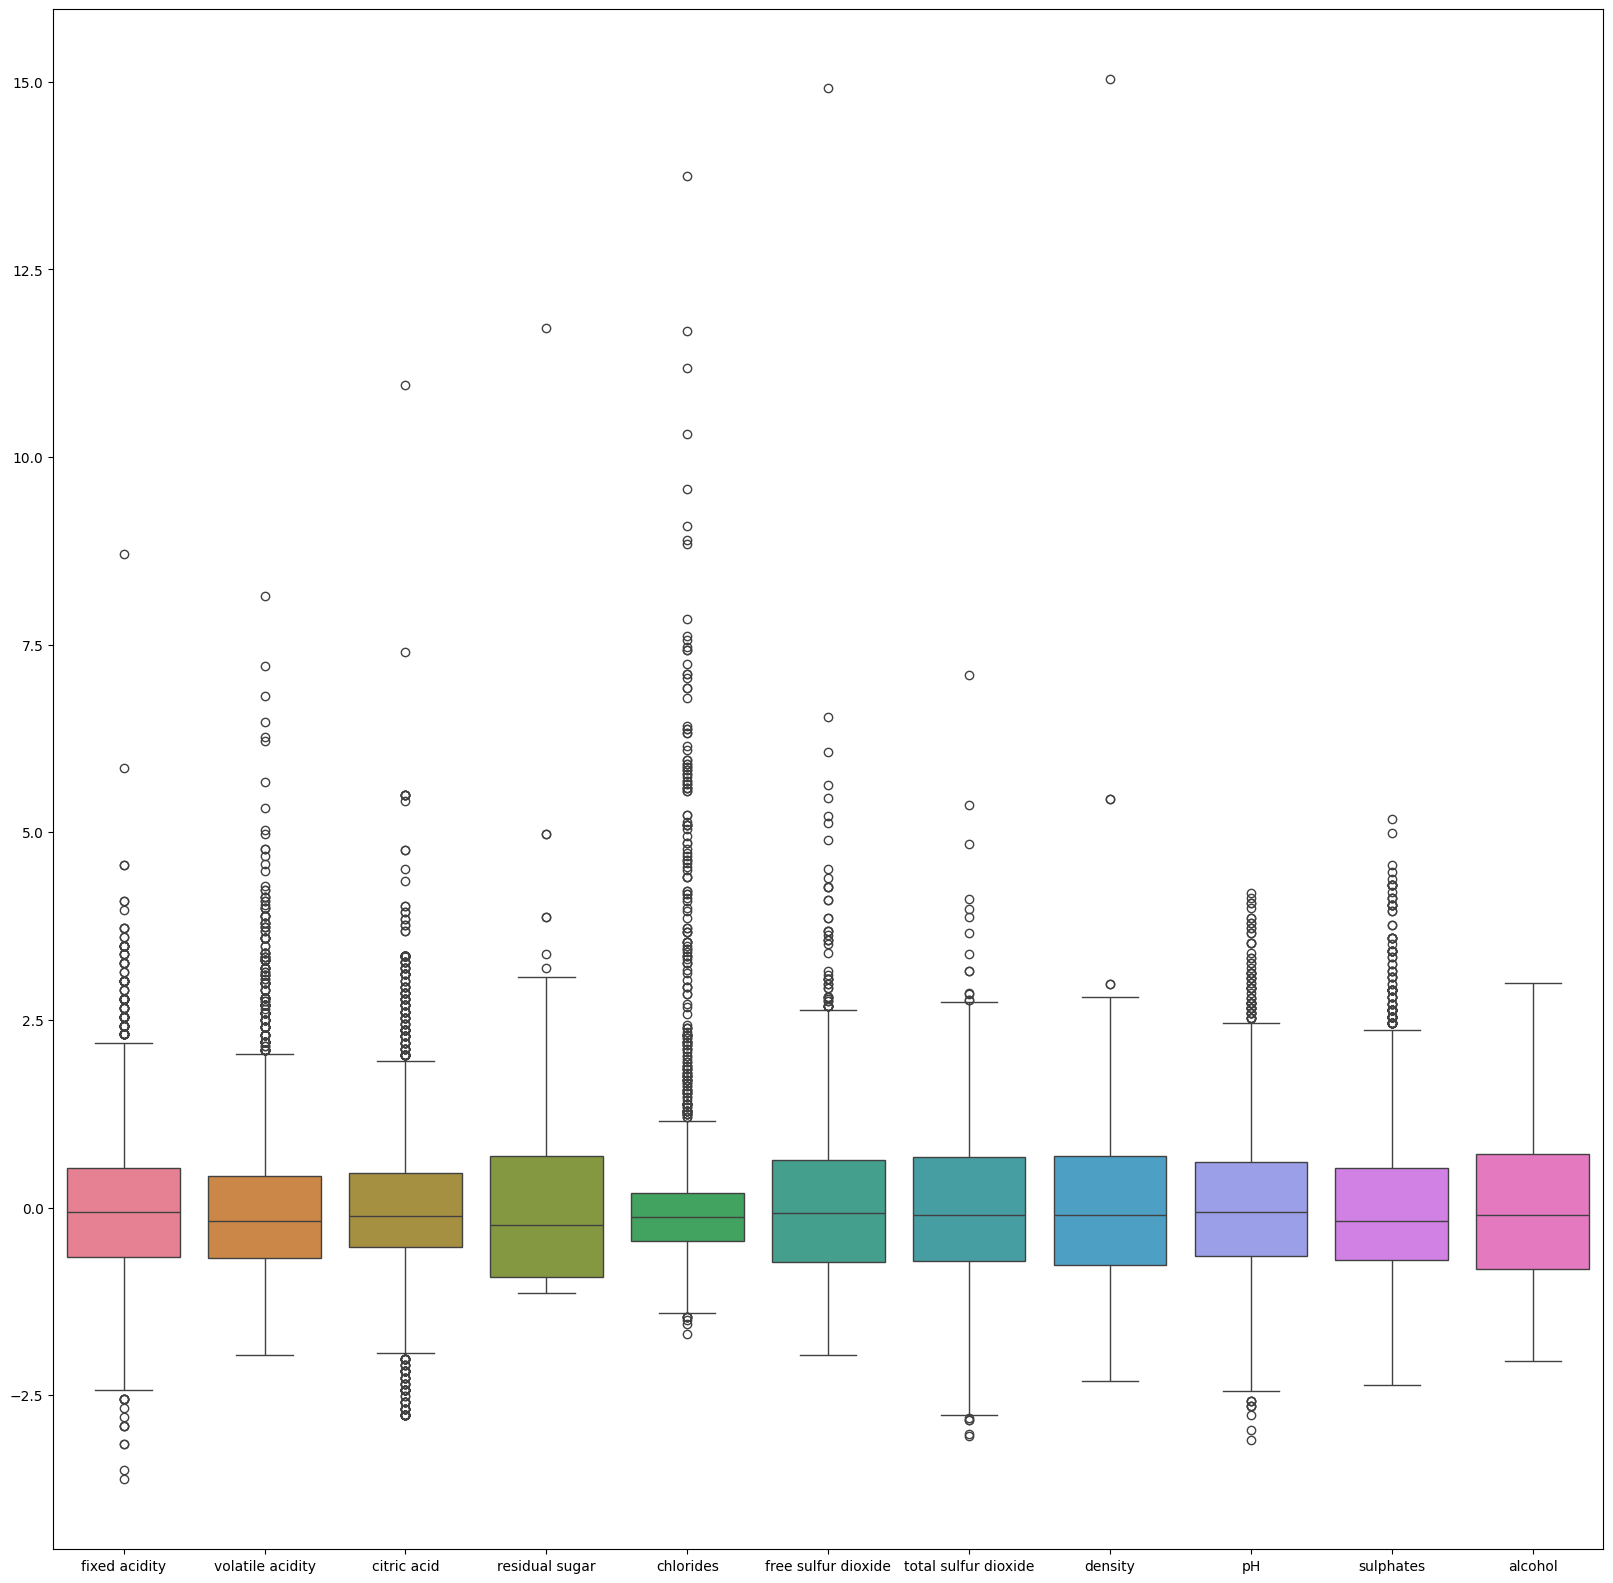

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data=X_scaled, ax=ax)

removing outliers

<Axes: >

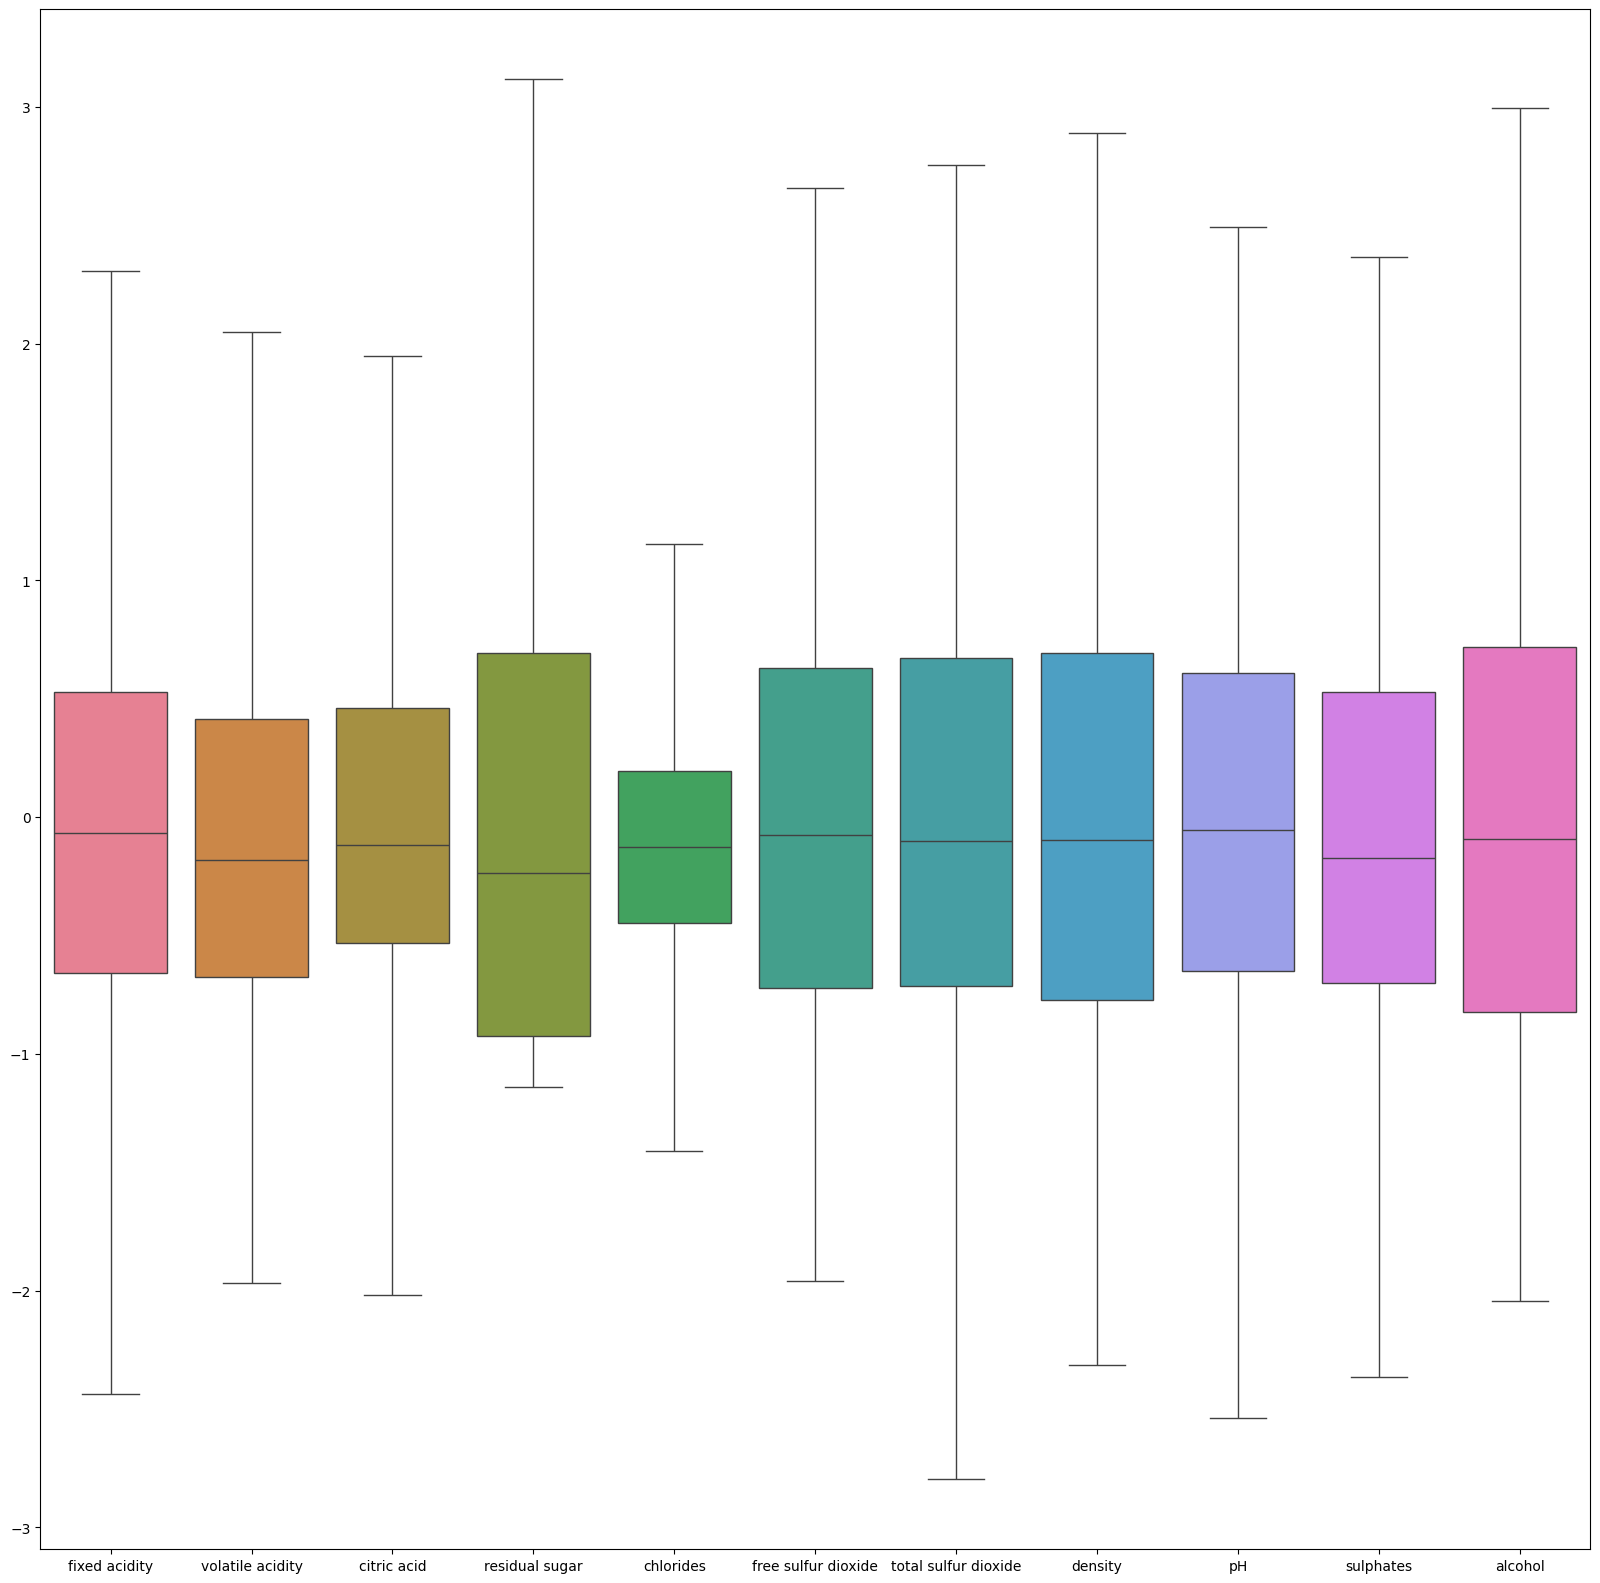

In [23]:
for col in X_scaled.columns:
    Q1=X_scaled[col].quantile(0.25)
    Q3=X_scaled[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    X_scaled[col]=np.where(X_scaled[col]<lower_bound,lower_bound,X_scaled[col])
    X_scaled[col]=np.where(X_scaled[col]>upper_bound,upper_bound,X_scaled[col])
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data=X_scaled, ax=ax)

model training

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.1,random_state=20)

descision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
y_pred = dt.predict(X_test)
print(y_pred)

[7 5 6 6 6 5 6 5 6 6 6 7 6 5 7 6 6 6 8 6 5 6 5 6 6 6 4 6 5 6 6 6 6 5 6 7 6
 5 6 6 7 5 7 4 4 5 4 5 7 6 5 6 6 6 8 6 7 6 5 7 6 5 6 6 5 6 5 4 4 6 5 5 6 7
 5 7 5 7 7 4 5 7 6 6 5 4 5 7 6 6 6 5 5 6 6 6 6 5 7 5 8 7 5 4 5 6 6 5 5 5 6
 5 5 7 6 7 6 6 7 6 5 5 6 6 8 5 5 5 6 6 6 6 5 7 5 6 6 6 6 6 6 5 6 6 4 5 7 6
 8 7 5 7 4 5 6 6 7 6 5 5 8 5 6 4 5 6 6 5 8 7 5 6 5 6 6 7 7 5 8 6 6 6 4 6 8
 7 6 7 4 7 5 6 7 6 5 6 6 5 5 7 5 6 4 8 5 7 7 6 6 5 6 6 6 6 5 7 6 6 7 6 6 7
 6 6 6 4 5 7 6 5 5 4 7 5 6 5 5 6 6 6 6 6 5 6 5 6 5 5 6 6 6 5 6 6 6 6 6 5 6
 6 6 5 6 6 6 4 5 6 6 6 6 7 6 6 7 7 6 6 5 6 5 6 7 7 6 6 6 6 6 6 6 5 7 5 5 6
 6 7 6 5 6 6 6 5 5 7 7 4 8 6 5 7 7 5 6 5 6 6 6 7 6 6 5 6 6 5 7 6 6 5 6 6 5
 7 5 5 4 6 6 6 5 6 6 6 5 6 7 5 6 5 6 5 5 6 7 6 6 7 6 4 6 6 6 5 5 7 6 6 5 6
 5 8 4 7 5 6 6 5 6 6 7 7 6 6 6 6 6 5 6 6 5 6 6 5 6 5 5 6 5 5 6 6 6 6 6 7 6
 4 6 6 5 6 5 6 5 6 7 8 6 6 5 6 5 5 6 4 6 5 6 6 7 6 6 7 6 6 6 5 6 7 8 5 6 6
 5 6 8 6 7 6 6 4 4 7 6 6 5 6 7 5 8 6 4 5 6 6 5 8 5 7 5 5 6 8 5 4 6 5 5 5 5
 6 4 6 6 5 7 6 6 6]


[Text(0.43336282159574824, 0.9772727272727273, 'x[10] <= -0.323\ngini = 0.674\nsamples = 4408\nvalue = [17.0, 139.0, 1303.0, 1989.0, 797.0, 160.0, 3.0]'),
 Text(0.1621447157406461, 0.9318181818181818, 'x[1] <= -0.404\ngini = 0.6\nsamples = 1966\nvalue = [8, 72, 940, 799, 130, 17, 0]'),
 Text(0.29775376866819714, 0.9545454545454546, 'True  '),
 Text(0.050261321815579636, 0.8863636363636364, 'x[0] <= -0.124\ngini = 0.617\nsamples = 656\nvalue = [3.0, 10.0, 182.0, 350.0, 95.0, 16.0, 0.0]'),
 Text(0.027780617460641994, 0.8409090909090909, 'x[3] <= 2.121\ngini = 0.504\nsamples = 263\nvalue = [2, 2, 74, 169, 16, 0, 0]'),
 Text(0.026962788795747292, 0.7954545454545454, 'x[9] <= -0.13\ngini = 0.529\nsamples = 241\nvalue = [2, 2, 74, 147, 16, 0, 0]'),
 Text(0.015692087507667145, 0.75, 'x[0] <= -0.243\ngini = 0.579\nsamples = 145\nvalue = [2, 1, 57, 74, 11, 0, 0]'),
 Text(0.009711715395624617, 0.7045454545454546, 'x[7] <= 1.736\ngini = 0.581\nsamples = 123\nvalue = [2, 1, 56, 56, 8, 0, 0]'),
 Te

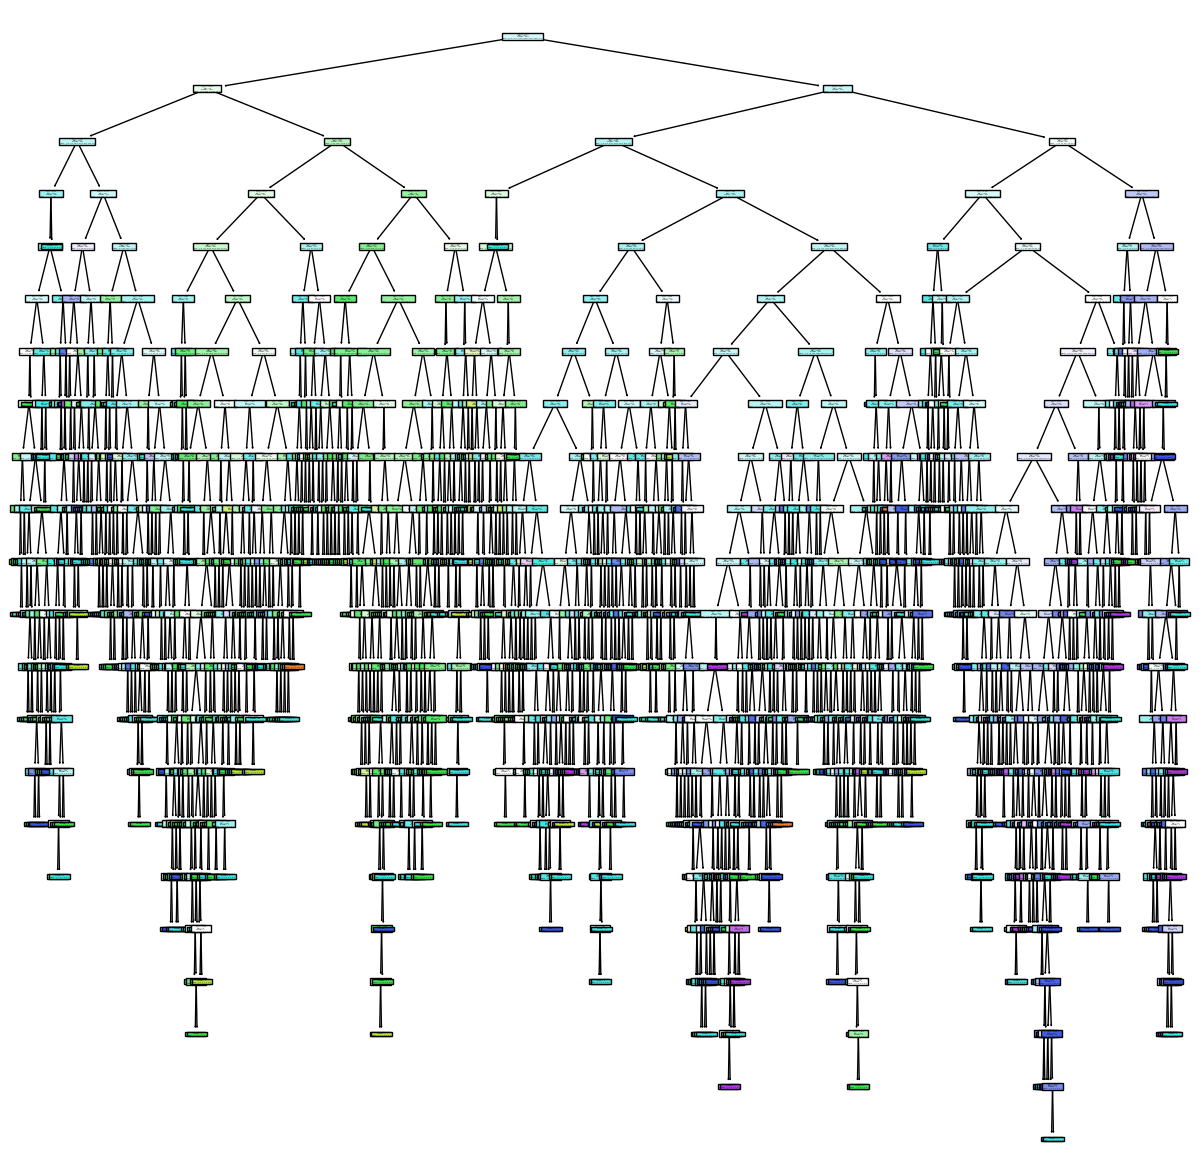

In [44]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt, filled=True)

random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
model.score(X_test, Y_test)

0.689795918367347

In [48]:
Y_pred_rf=model.predict(X_test)
print(Y_pred_rf)

[7 5 6 6 6 7 6 5 5 5 6 6 6 5 6 5 6 6 8 6 5 6 6 6 6 6 4 6 5 5 6 6 6 5 5 7 6
 6 6 6 6 5 6 5 5 5 5 6 7 6 5 6 6 6 4 6 7 6 6 7 6 5 6 6 6 6 6 6 4 5 5 5 6 7
 5 6 6 7 7 6 6 6 6 6 5 5 5 6 6 5 6 5 6 5 6 6 6 5 6 5 6 6 6 4 5 6 6 6 5 6 6
 5 6 8 6 7 6 6 7 6 5 5 6 5 6 5 6 5 6 6 5 5 6 6 6 6 6 6 6 5 7 5 6 6 6 6 7 6
 6 6 5 7 5 6 6 5 6 6 6 6 7 5 6 5 5 6 6 5 8 7 5 6 5 5 6 7 6 5 7 6 6 6 6 7 8
 6 7 6 5 7 5 6 7 6 5 6 6 5 5 7 6 6 4 8 5 6 7 5 6 5 6 6 6 6 5 7 6 6 7 7 6 6
 6 7 6 6 5 6 6 6 6 5 7 5 6 5 5 6 6 6 6 6 5 5 5 6 5 5 6 5 6 5 5 6 6 6 6 5 6
 7 6 5 6 6 6 4 5 6 6 6 5 6 6 5 6 5 6 5 5 5 5 5 6 6 6 6 6 6 6 5 6 6 6 5 6 6
 6 7 5 5 6 6 6 5 5 7 6 4 6 6 5 6 7 5 7 6 6 6 6 6 6 6 5 6 6 5 7 7 6 6 6 5 5
 5 5 5 4 6 6 6 6 6 6 6 5 6 7 5 6 5 5 5 6 6 7 6 6 7 6 6 6 6 7 5 6 7 6 6 6 6
 5 8 4 6 5 6 6 5 6 6 6 7 6 6 6 6 6 6 6 6 5 6 6 6 6 5 5 6 5 5 6 6 6 6 5 7 5
 5 6 6 6 6 5 6 5 6 7 7 6 6 6 6 4 5 6 6 6 5 6 6 7 6 6 6 6 5 6 7 6 6 8 5 6 6
 6 6 7 6 7 6 6 5 6 7 6 6 5 6 7 5 8 6 5 5 6 5 5 8 5 6 5 5 5 7 5 5 6 5 6 5 5
 6 6 6 6 6 7 4 6 6]


Hyperparameter Tuning: GridSearchCV and RandomSearchCV

In [49]:
grid_param =  {
    "n_estimators" : [5 , 10, 20],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(5)
}

In [52]:
from sklearn.model_selection import GridSearchCV
# avoid multiprocessing backend that may require _posixsubprocess on this platform
grid_serach_rf = GridSearchCV(param_grid=grid_param, cv=10, n_jobs=1, verbose=1, estimator=model)
grid_serach_rf.fit(X_train, Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(0, 5), 'n_estimators': [5, 10, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [53]:
grid_serach_rf.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 20}

In [55]:
rf_new = RandomForestClassifier(n_estimators=120, criterion='entropy', max_depth=4)
rf_new.fit(X_train, Y_train)
rf_new.score(X_test, Y_test)

0.5285714285714286